In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1
gts = pd.read_csv("gts-seoul.csv")
task1 = gts.loc[gts['일시'] == '2011-03-21 06:00', ['습도', '풍속', '현지기압', '기온', '이슬점 온도']]

task1.습도 = pd.to_numeric(task1.습도)
task1.풍속 = pd.to_numeric(task1.풍속)
task1.현지기압 = pd.to_numeric(task1.현지기압)
task1.기온 = pd.to_numeric(task1.기온)
task1['이슬점 온도'] = pd.to_numeric(task1['이슬점 온도'])

task1_result = task1.습도 + task1.풍속 + task1.현지기압 + task1.기온 + task1['이슬점 온도']
task1_result

2101    1038.9
dtype: float64

In [4]:
#2
task2 = gts[['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
task2 = task2.dropna(axis = 0, how = 'any') #32068

#평균 습도 - 59.02
task2.습도 = pd.to_numeric(task2.습도)
task2_mean = task2['습도'].mean()

#최대 풍속 - 19.0
task2.풍속 = pd.to_numeric(task2.풍속)
task2_max = task2['풍속'].max()

#최저 기온 - -17.6
task2.기온 = pd.to_numeric(task2.기온)
task2_min = task2['기온'].min()

#계산
task2_result = len(task2) + task2_mean + task2_max + task2_min
task2_result

32128.421619683173

In [8]:
#3-1
import sys
def corr(a, b):
    mean_a = a - a.mean()
    mean_b = b - b.mean()
    
    return (mean_a * mean_b).sum() / (((mean_a ** 2).sum() * (mean_b ** 2).sum() ) ** 0.5)

a = corr(gts['습도'],gts['이슬점 온도'])
b = corr(gts['풍속'], gts['이슬점 온도'])
c = corr(gts['현지기압'], gts['이슬점 온도'])
d = corr(gts['기온'], gts['이슬점 온도'])
print(a + b + c + d)

1.1790706179936374


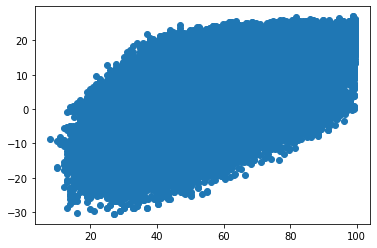

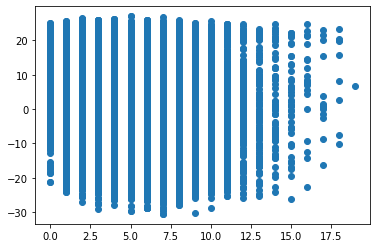

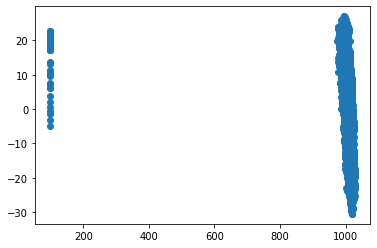

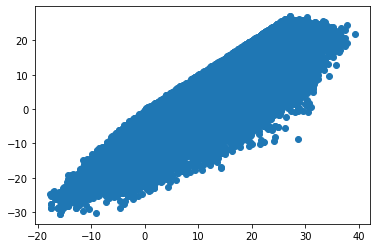

In [10]:
#3-2
plt.scatter(gts['습도'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['풍속'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['현지기압'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['기온'],gts['이슬점 온도'])
plt.show()

In [12]:
#3-3
task3 = task2[(task2['현지기압'] < 200) == False]
task3

,습도,풍속,현지기압,기온,이슬점 온도
0,70.7,3.0,995.0,25.0,19.3
1,61.8,3.0,993.9,27.9,19.9
2,49.7,3.0,992.3,30.5,18.8
3,66.8,6.0,992.1,28.8,22.0
4,79.6,4.0,993.4,26.3,22.5
...,...,...,...,...,...
32080,65.7,11.0,987.0,21.7,15.0
32081,83.8,5.0,989.7,18.9,16.1
32082,84.9,7.0,991.2,18.8,16.2
32083,85.9,4.0,991.7,18.4,16.0


In [13]:
#3-4
task3['현지기압'] = pd.to_numeric(task3['현지기압'])

a = corr(task3['습도'],task3['이슬점 온도'])
b = corr(task3['풍속'], task3['이슬점 온도'])
c = corr(task3['현지기압'], task3['이슬점 온도'])
d = corr(task3['기온'], task3['이슬점 온도'])

print(a + b + c + d)

0.6187252015474831


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


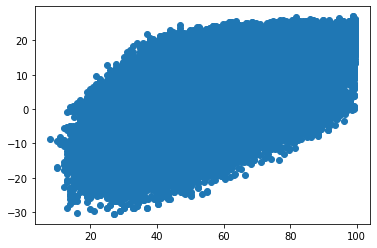

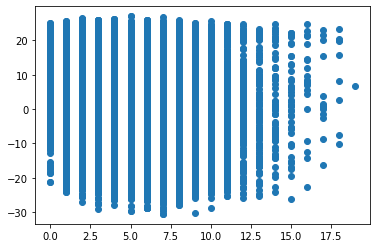

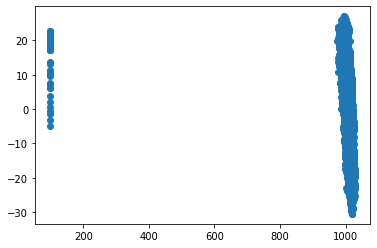

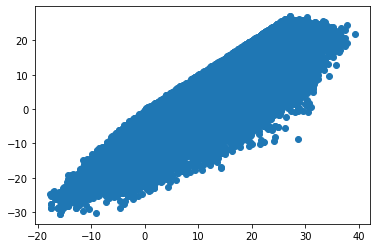

In [14]:
#3-5

plt.scatter(gts['습도'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['풍속'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['현지기압'],gts['이슬점 온도'])
plt.show()
plt.scatter(gts['기온'],gts['이슬점 온도'])
plt.show()

In [15]:
#4-1
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = task3[['습도', '풍속', '현지기압', '기온']]
Y = task3[['이슬점 온도']]

model.fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[ 0.2676329  -0.03078923  0.00952646  0.92936961]]
[-32.91662937]


In [16]:
#4-2
predict = model.predict(X)
((predict - Y) ** 2).mean()

이슬점 온도    1.168515
dtype: float64

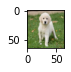

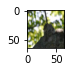

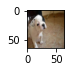

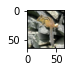

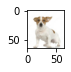

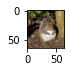

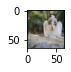

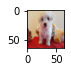

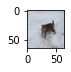

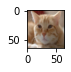

In [17]:
#1-1
import pickle
import matplotlib.pyplot as plt

data = pickle.load(open("mid_animal_data_pub.pkl", "rb"))
for i in range(0,10):
    plt.subplot(5,2,i+1)
    plt.imshow(data['test1_images'][i])
    plt.show()

In [18]:
#1-2
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

cos_sim(data['train_vectors'][0], data['test1_vectors'][1])

-0.23914206

In [20]:
#1-3
ids = []
for i in range(10):
  arr = []
  for j in range(data['train_vectors'].shape[0]):
   arr.append((cos_sim(data['test1_vectors'][i], data['train_vectors'][j]),j))

  arr.sort(reverse = True)
  ids.append([i for c, i in arr[:3]])
ids

[[346, 442, 158],
 [463, 97, 70],
 [240, 699, 480],
 [571, 977, 338],
 [593, 282, 584],
 [498, 835, 37],
 [736, 324, 918],
 [127, 382, 959],
 [7, 991, 141],
 [447, 847, 501]]

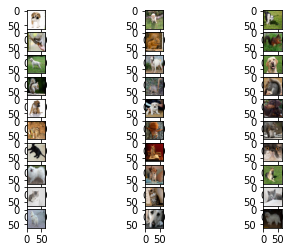

In [21]:
i=1
for arr in ids:
  for j in arr:
    plt.subplot(10, 3, i)
    plt.imshow(data['train_images'][j])
    i += 1
plt.show()

In [22]:
#1-5
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256, 3)

optim = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z, y_train)
  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch%1000 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 5.6049933433532715
epoch: 1000, cost: 6.871543155284598e-05
epoch: 2000, cost: 5.0221973651787266e-05
epoch: 3000, cost: 3.693173857755028e-05
epoch: 4000, cost: 2.686931111384183e-05
epoch: 5000, cost: 1.8833872672985308e-05
epoch: 6000, cost: 1.2666322618315462e-05
epoch: 7000, cost: 8.239270755439065e-06
epoch: 8000, cost: 5.235430762695614e-06
epoch: 9000, cost: 3.275646804468124e-06
epoch: 10000, cost: 2.02930937120982e-06


In [23]:
#1-6
test2 = torch.from_numpy(data['test2_vectors'])
"".join([str(x) for x in torch.argmax(model(test2), dim=1).tolist()])

'212220001122112100202120111122'